In [111]:

import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.svm import SVC

In [113]:
import os
import librosa
import librosa.display
import glob 
import skimage

In [114]:
df = pd.read_csv("D:\\dataset\\UrbanSound8K\\metadata\\UrbanSound8K.csv")

'''We will extract classes from this metadata.'''

df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [115]:
dat1, sampling_rate1 = librosa.load('D:\\dataset\\UrbanSound8K\\audio\\fold5\\100032-3-0-0.wav')
dat2, sampling_rate2 = librosa.load('D:\\dataset\\UrbanSound8K\\audio\\fold5\\100263-2-0-117.wav')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

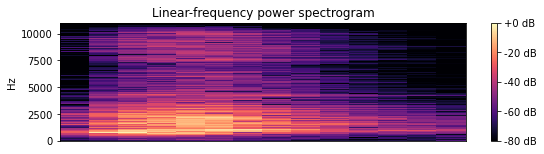

In [116]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

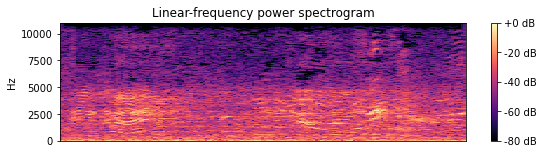

In [117]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat2)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

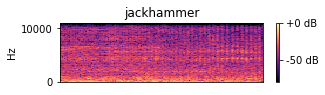

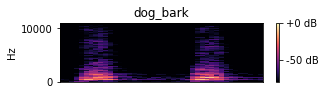

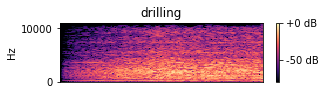

In [118]:
arr = np.array(df["slice_file_name"])
fold = np.array(df["fold"])
cla = np.array(df["class"])

for i in range(192, 197, 2):
    path = 'D:\\dataset\\UrbanSound8K\\audio\\fold' + str(fold[i]) + '\\' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

In [119]:
dat1, sampling_rate1 = librosa.load('D:\\dataset\\UrbanSound8K\\audio\\fold5\\100032-3-0-0.wav')
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
arr.shape

(128, 14)

In [120]:
feature = []
label = []

def parser(row):
    # Function to load files and extract features
    for i in range(8732):
        file_name = 'D:\\dataset\\UrbanSound8K\\audio\\fold' + str(df["fold"][i]) + '\\' + df["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
        mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)        
        feature.append(mels)
        label.append(df["classID"][i])
    return [feature, label]

In [121]:
feature

[]

In [122]:
temp = parser(df)

D:\Ana\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
D:\Ana\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
D:\Ana\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(


In [123]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.13903877,
       -0.15396479, -0.12887858], dtype=float32)

In [124]:
temp = np.array(temp)
data = temp.transpose()

<ipython-input-124-16088c198d1d>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp = np.array(temp)


In [125]:
X

array([0.01356488, 0.02534647, 0.02361279, ..., 0.00716996, 0.00383315,
       0.        ], dtype=float32)

In [126]:
X_ = data[:, 0]
Y = data[:, 1]
print(X_.shape, Y.shape)
X = np.empty([8732, 128])

(8732,) (8732,)


In [127]:
Y

array([3, 2, 2, ..., 1, 1, 1], dtype=object)

In [128]:
Y.shape

(8732,)

In [129]:
X.shape

(8732, 128)

In [130]:
for i in range(8732):
    X[i] = (X_[i])

In [131]:
X

array([[2.69797547e-05, 2.21967508e-04, 2.99852749e-04, ...,
        2.13047184e-04, 8.36914296e-06, 6.56874647e-07],
       [4.97026183e-02, 4.95300293e-02, 3.71738970e-02, ...,
        3.52364751e-08, 1.27020767e-08, 6.44720410e-09],
       [3.08508892e-02, 2.80217305e-02, 3.64455692e-02, ...,
        1.57836286e-08, 4.88009277e-09, 2.65019717e-09],
       ...,
       [1.63492076e-02, 6.28008023e-02, 6.23560697e-02, ...,
        4.95597305e-06, 7.77829257e-07, 1.89893413e-07],
       [2.41814945e-02, 7.76272714e-02, 6.35417327e-02, ...,
        1.77421171e-07, 4.56534117e-08, 1.88543190e-08],
       [3.62176672e-02, 5.45288920e-02, 9.47519615e-02, ...,
        1.16510398e-06, 3.44087340e-07, 1.89945368e-07]])

In [132]:
Y = to_categorical(Y) #reversefunction 

In [133]:
print(X.shape)
print(Y.shape)

(8732, 128)
(8732, 10)


In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [135]:
X_train.shape

(6549, 128)

In [136]:
X_test.shape

(2183, 128)

In [159]:
#X_train = X_train.reshape(6549,16,8,1)
#X_test = X_test.reshape(2183, 16, 8, 1)

X_train = X_train.reshape(X_train.shape[0],32,4,1) #samplesize
X_test = X_test.reshape(X_test.shape[0],32,4,1)

In [160]:
X_test[1]

array([[[1.27187377e-05],
        [2.54834886e-04],
        [1.54628383e-03],
        [3.00249481e-03]],

       [[2.54429714e-03],
        [1.68291549e-03],
        [1.53539435e-03],
        [2.87744752e-03]],

       [[3.39966011e-03],
        [3.31097189e-03],
        [2.41633086e-03],
        [2.51584291e-03]],

       [[2.02747621e-03],
        [1.27027452e-03],
        [1.21222949e-03],
        [1.35796901e-03]],

       [[1.66429428e-03],
        [1.07732322e-03],
        [1.13056903e-03],
        [1.35794631e-03]],

       [[1.15517387e-03],
        [1.30047731e-03],
        [2.06162361e-03],
        [2.05150573e-03]],

       [[1.62134762e-03],
        [1.53297931e-03],
        [1.25641341e-03],
        [1.07902789e-03]],

       [[1.08996360e-03],
        [9.64637613e-04],
        [1.06119970e-03],
        [1.20971748e-03]],

       [[1.35797227e-03],
        [1.31623540e-03],
        [1.02430349e-03],
        [1.33664499e-03]],

       [[1.51092431e-03],
        [7.81255309e

In [167]:
#input_dim = (16,8, 1)
input_dim=(32,4,1)


In [168]:
model = Sequential()

In [169]:



model.add(Conv2D(64, (1, 1), padding = "same", activation = "tanh", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (1, 1), padding = "same", activation = "tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))




model.add(Flatten())

#lstm layers
#2 layers

model.add(Dense(1024, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))

In [170]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [171]:
mod=model.fit(X_train, Y_train, epochs = 50, batch_size = 50, validation_data = (X_test, Y_test))

Epoch 1/50
131/131 [==============================] - 5s 36ms/step - loss: 1.6931 - accuracy: 0.4045 - val_loss: 1.6541 - val_accuracy: 0.4379
Epoch 2/50
131/131 [==============================] - 3s 26ms/step - loss: 1.5142 - accuracy: 0.4677 - val_loss: 1.6666 - val_accuracy: 0.4288
Epoch 3/50
131/131 [==============================] - 4s 28ms/step - loss: 1.4649 - accuracy: 0.4863 - val_loss: 1.4980 - val_accuracy: 0.4782
Epoch 4/50
131/131 [==============================] - 4s 27ms/step - loss: 1.4323 - accuracy: 0.4932 - val_loss: 1.5246 - val_accuracy: 0.4787
Epoch 5/50
131/131 [==============================] - 4s 27ms/step - loss: 1.3830 - accuracy: 0.5098 - val_loss: 1.4427 - val_accuracy: 0.4947
Epoch 6/50
131/131 [==============================] - 4s 27ms/step - loss: 1.3413 - accuracy: 0.5254 - val_loss: 1.4083 - val_accuracy: 0.5286
Epoch 7/50
131/131 [==============================] - 4s 30ms/step - loss: 1.3152 - accuracy: 0.5353 - val_loss: 1.3845 - val_accuracy: 0.5222

In [183]:
mod.history

{'loss': [1.6931015253067017,
  1.514189600944519,
  1.4649074077606201,
  1.4322600364685059,
  1.3830252885818481,
  1.3413077592849731,
  1.3152275085449219,
  1.2820367813110352,
  1.2468889951705933,
  1.2086995840072632,
  1.1677700281143188,
  1.1278998851776123,
  1.094366192817688,
  1.0475605726242065,
  1.008098840713501,
  0.9657326340675354,
  0.9367784261703491,
  0.8953143954277039,
  0.8712010383605957,
  0.8351629376411438,
  0.807594358921051,
  0.7763221263885498,
  0.7466199994087219,
  0.7286658883094788,
  0.6908167004585266,
  0.660204291343689,
  0.6498996019363403,
  0.6152360439300537,
  0.5929442644119263,
  0.58349609375,
  0.555067241191864,
  0.5404430031776428,
  0.5080626010894775,
  0.4866844117641449,
  0.4807109236717224,
  0.45994871854782104,
  0.4426397383213043,
  0.4325086176395416,
  0.4181312620639801,
  0.41924428939819336,
  0.3853320777416229,
  0.3782086968421936,
  0.3775026500225067,
  0.3567921817302704,
  0.3488120138645172,
  0.3388400

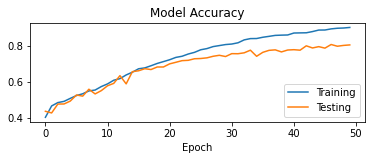

In [184]:
plt.subplot(211)
plt.plot(mod.history['accuracy'])
plt.plot(mod.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='lower right')

In [185]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 4, 64)         128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 2, 64)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 2, 64)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 2, 128)        8320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 1, 128)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 8, 1, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)             

In [186]:
predictions = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print(score)

69/69 [==============================] - 0s 5ms/step - loss: 0.6116 - accuracy: 0.8071
[0.6115841269493103, 0.8071461319923401]


In [187]:
predictions = model.predict(X_test)

In [188]:
model.predict_classes(X_test)

D:\Ana\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 8, 8, ..., 2, 4, 3], dtype=int64)

In [189]:
preds = np.argmax(predictions, axis = 1)

In [190]:
result = pd.DataFrame(preds)
result.to_csv("UrbanSound8kResults.csv")

In [180]:
result

,0
0,2
1,8
2,8
3,5
4,5
...,...
2178,6
2179,9
2180,2
2181,4


In [181]:
X_train.shape

(6549, 32, 4, 1)

In [182]:
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)


NameError: name 'mfccs_scaled_features' is not defined

In [ ]:
from sklearn.metrics import classification_report
classification_report(Y_test, predictions)

In [ ]:
 #Evaluating the model on the training and testing set
score = model.evaluate(X_train, Y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, Y_test, verbose=0)
print("Testing Accuracy: ", score[1])



In [211]:
file_name = "D:\\dataset\\UrbanSound8K\\audio\\fold3\\9223-2-0-2.wav"
        # Here kaiser_fast is a technique used for faster extraction
X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        # We extract mfcc feature from data
mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0) 

In [212]:
mels=mels.transpose()
mels=mels.reshape(1,32,4,1)

In [213]:
predictions = model.predict(mels)

In [214]:


preds = np.argmax(predictions, axis = 1)
result = pd.DataFrame(preds)

In [215]:
result

,0
0,2


In [216]:
result[0]

0    2
Name: 0, dtype: int64